# Lecture 9: Continuous Random Variables and Their Distributions
***

In this notebook we'll get some more practice working with continuous random variables, their probability density functions, and their cumulative distribution functions.  Additionally, we'll see how we can sample from some continuous distributions using Python and explore the relationship between these samples and their associated densities. 

We'll need Numpy, Matplotlib, and possibly Pandas for this notebook, so let's load them. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

### Exercise 1 - Waiting For Buses 
*** 

Rhonda, arriving at a bus stop, just misses the bus.  Suppose that she decides to walk if the next bus takes longer than 5 minutes to arrive. Suppose also that the time in minutes between arrivals of buses at the bus stop is a continuous random variable with a $U(4,7)$ distribution. Let $X$ be the time that Rhonda will wait. 

**Part A**: What is the probability that $X$ is less than $4\frac{1}{2}$ minutes? 

***
**Solution**: 
The probability density function for $X$ is $$f(x) = \begin{cases} \dfrac{1}{7-4} = \dfrac{1}{3} & \text{for } ~ 4 \leq x \leq 7 \\ 0 & \text{otherwise} \end{cases}$$ 

The probability we're after is then 

$$
P\left(X \leq 4\frac{1}{2}\right) 
= \int_{-\infty}^{4\frac{1}{2}} \frac{1}{3}~dx
= \int_{4}^{4\frac{1}{2}} \frac{1}{3}~dx
= \frac{1}{3} \cdot \left(4\frac{1}{2} -4 \right) = \frac{1}{3}\cdot\frac{1}{2} = \frac{1}{6} 
$$

Note that since this is a uniform distribution we could have come to the same conclusion by noting that the total length of the interval is $3$ minutes and $\frac{1}{2}$ minutes is $\frac{1}{6}$ of $3$ minutes. 

***


**Part B**: What is the probability that $X$ is exactly 5 minutes? 

***
**Solution**: The probability $P(X = 5)$ is zero.  Remember that for continuous random variables, the probability that the random variable takes on a single value is always zero. 
***

**Part C**: What is the probability that Rhonda ends up walking?  Try to formulate this problem in terms of the pdf and/or cdf of $X$.

***
**Solution**: We know that Rhonda will walk if the bus takes longer than 5 minutes to arrive.  Thus we're interested in $P(X > 5)$.  Again, since $X$ is $U(4,7)$ we could note that Rhonda will walk if the bus arrives in the $2$ minutes between $5$ and $7$.  Since that is $\frac{2}{3}$ of the $3$ minute time interval the probability is $\frac{2}{3}$. 

We can also practice doing this with the definition of the density function.  We have 

$$
P(X > 5) = P(5 < X \leq 7) = \int_5^7 \frac{1}{3}~dx = \frac{1}{3}\left(7-5 \right) = \frac{2}{3}
$$

Finally, we can also practice using the cumulative distribution function itself.  For this problem we have 

$$
F(X \leq x) 
= \int_{-\infty}^x \frac{1}{3}~dy 
= \int_{4}^x \frac{1}{3}~dy = \frac{1}{3}\left(x - 4\right) \textrm{ for } 4 \leq x \leq 7 
$$

Then, we have 

$$
P(X > 5) = 1 - P(X \leq 5) = 1 - F(5) = 1 - \frac{1}{3}\left(5 - 4\right) = 1 - \frac{1}{3} = \frac{2}{3}
$$

***

### Exercise 2 - Darts and Probabilities 
*** 

Suppose you are throwing darts at a dart board of radius $R$. Let $X$ be a random variable that measures the distance between the center of the dart board and the place that your dart lands.  Suppose that you're passable at darts, so you never miss the board entirely.    

**Part A**: Based on the assumptions above, and some common sense, what are the values that the random variable $X$ can take on? 

***
**Solution**: We know that $X$ cannot take on negative values because distances can't be negative, so we have $X \geq 0$.  Further, we've assumed that you always hit the dart board, so we must have $X \leq R$.  Thus the admissible values for $X$ are $0 \leq X \leq R$.
***

**Part B**: Consider the cumulative distribution function $F(x)$ for the scenario above.  

First, convince yourself that the following are true: 

$$
F(x) = P(X \leq x) = 0 \textrm{ for } x < 0 
\quad \textrm{and} \quad 
F(x) = P(X \leq x) = 1 \textrm{ for } x \geq R 
$$

It might help to do a quick **concept check** and see if you can explain in plain English what these mathematical statements mean.

Now, we need to define the distribution function for the $x$'s on the actual dart board.  Suppose that the probability of hitting _within_ a particular distance $x$ from the center is proportional to the area of the board from the center to the edge of a ring of radius $x$.  Based on this assumption, write down the definition of $F(x)$ for $0 \leq x \leq R$. 

***
**Solution**: The assumptions tell us that $P(X \leq x)$ must be proportional to the area of the ring of radius $x$ centered at the center of the dart board.  Thus we must have 

$$
F(x) = P(X \leq x) = c\cdot \pi x^2
$$

We need to choose $c$ such that $F(R) = 1$, since by assumption we always hit inside the dart board.  We then see that the form of the distribution function is  

$$
F(x) = P(X \leq x) = \frac{\pi x^2}{\pi R^2} = \frac{x^2}{R^2} \quad \textrm{ for } 0 \leq x \leq R
$$

***

**Part C**: Use the cumulative distribution function $F(x)$ you found in **Part B** to define the probability density function $f(x)$ for the random variable $X$. 

***
**Solution**: We know that the density function is the derivative of the distribution function.  We thus have 

$$
f(x) = \frac{d}{dx}F(x) = \frac{2x}{R^2} \quad \textrm{ for } \quad 0 \leq x \leq R \quad \textrm{ and } \quad f(x) = 0 \textrm{ elsewhere}
$$

***

**Part D**: Compute the probability that your dart lands within half the radius of the dart board (i.e. $0 \leq X \leq \frac{R}{2}$) as well as the probability that your dart lands outside of half the radius of the dart board (i.e. $\frac{R}{2} < X \leq R$.)

***
**Solution**: It's probably easier to use the distribution function $F(x)$ here.  We have 

$$
P\left(0 \leq X \leq \frac{R}{2}\right) = P\left(X \leq \frac{R}{2}\right) = F\left(\frac{R}{2}\right) = \frac{(\frac{R}{2})^2}{R^2} = \frac{1}{4}
$$

Similarly, we have 

$$
P\left(\frac{R}{2} < X \leq R\right) = 1 - P\left(X \leq \frac{R}{2}\right) = 1 - F\left(\frac{R}{2}\right) = 1 - \frac{(\frac{R}{2})^2}{R^2} = 1 -\frac{1}{4} = \frac{3}{4}
$$


***

**Part E**: Finally, find the distance away from the center such that $50\%$ of all darts will land within this distance.  Or, said another way, find the $50$th percentile of the distribution of $X$.   

***
**Solution**: We can find the 50th percentile by setting the distribution function equal to $0.5$ and solving for $x$.  We have 

$$
F(x) = \frac{x^2}{R^2} = \frac{1}{2} 
\quad \Rightarrow \quad
x^2 = \frac{R^2}{2} 
\quad \Rightarrow \quad
x = \frac{R}{\sqrt{2}} 
$$

Thus, according to our definition of the distribution of $X$, 50% of darts will land within $R / \sqrt{2}$ units of the center. 

***

### Exercise 3 - Sampling the Normal Distribution 
*** 

Let's first explore the normal distribution [here](https://academo.org/demos/gaussian-distribution/). Experiment with changing the parameters. What are the effects of:
- changing $\mu$?
- changing $\sigma$?

Recall that the PDF of a normal distribution is:

$$P(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2}$$

- Why is it important that $\sigma$ is in two places in this density function?

** Answer:**
- Changing $\mu$ shifts the PDF to the left or to the right. $\mu$ appears to be the center of the distribution. 

- Changing $\sigma$ makes the distribution wider (bigger $\sigma$) or thinner (smaller $\sigma$).

- The $\sigma$ in the exponential makes the distribution wider or thinner, but the $\sigma$ out in front adjusts the height so that the PDF still integrates to one.

**Part A**: Write a function pdf_normal that takes in a Numpy array of $x$-values and the parameters $\mu$ and $\sigma$ and returns a numpy array representing the density function of the normal distribution evaluated at the specified $x$-values. 

Obviously, you could use Scipy's norm.pdf function, but the point here is to practice writing functions and working with these distributions by hand, yourself, without hiding all the fun science within canned routines and blackbox functions. It will make you **tough**, and that's the whole point, really.

In [2]:
def pdf_normal(x, mu, sig):
    return np.exp(-0.5*(((x-mu)/sig)**2)) / (sig*np.sqrt(2*np.pi))

**Part B**: We can sample from a normal distribution using Numpy's [random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html#numpy.random.normal) function. Take a look at the docs, then write a function called compare_normal_sample_pdf that draws many samples from a normal distribution with the specified parameters and plots a density histogram of the samples overlaid by a plot of the density function you constructed in **Part A**.  Experiment with the number of samples as well as the histogram bin size.  How good of an approximation is the histogram to the true density function for varying numbers of samples and varying parameters of the normal distribution?  

In [11]:
def compare_normal_sample_pdf(mu, sig, num_samples=int(1e3)):
    
    # draw num_samples samples from N(mu, sig**2)
    z = pd.Series(np.random.normal(mu, sig, size=num_samples))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # draw histogram 
    z.hist(ax=ax, density=True, color="gray", bins=30, edgecolor="white", alpha=0.75)
    
    # draw probability density function 
    a, b = np.min(z), np.max(z)
    x = np.linspace(a, b, 300)
    p = pdf_normal(x, mu, sig)
    ax.plot(x, p, color="purple", alpha=0.9, lw=3)
    
    # make pretty 
    ax.set_ylim([0,.6])
    
    ax.set_xlabel(r"$x$", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

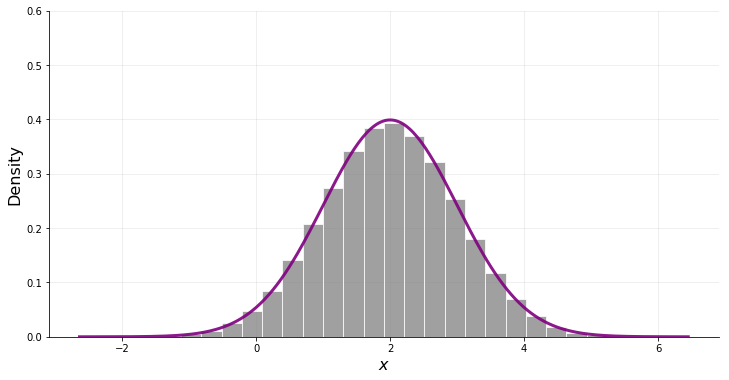

In [4]:
compare_normal_sample_pdf(2, 1, num_samples=int(1e5))

Looks pretty good to me! 

### Exercise 4 - Sampling the Exponential Distributions 
*** 

**Part A**: Write a function pdf_exp that takes as inputs a Numpy array of $x$-values and the rate parameter $\lambda$ and returns a Numpy array of the exponential distribution density function sampled at the $x$-values. 

Again, the point is not whether or not you can call a blackbox function in Scipy, but rather that you can implement the pdf for the exponential distribution by hand.

In [5]:
def pdf_exp(x, lam):
    return lam * np.exp(-lam*x)

**Part B**: We can sample from an exponential distribution using Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function. If you read the docs, you'll notice that random.exponential takes as it's input the so-called scale parameter $\beta$ which is defined to be the inverse of the rate parameter $\lambda$.  

Write a function called compare_exp_sample_pdf that draws many samples from an exponential distribution with the specified parameter and plots a density histogram of the samples overlaid by a plot of the density function you constructed in **Part A**.  Experiment with the number of samples as well as the histogram bin size.  How good of an approximation is the histogram to the true density function for varying numbers of samples and varying parameters of the exponential distribution?  

In [12]:
def compare_exp_sample_pdf(lam, num_samples=int(1e3)):
    
    # draw num_samples samples from the Exp(lam)
    beta = 1/lam 
    z = pd.Series(np.random.exponential(beta, size=num_samples))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # draw histogram 
    z.hist(ax=ax, density=True, color="gray", bins=30, edgecolor="white", alpha=0.75)
    
    # draw probability density function 
    T = np.max(z)
    x = np.linspace(0, T, 300)
    p = pdf_exp(x, lam)
    ax.plot(x, p, color="purple", alpha=0.9, lw=3)
    
    # make pretty 
    ymax = 1 if np.max(p) < .75 else np.max(p)
    ax.set_ylim([0,ymax])
    
    ax.set_xlabel(r"$x$", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

/Users/rachelcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


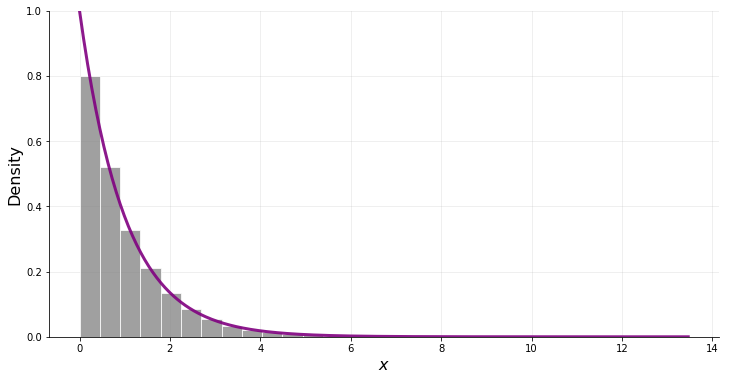

In [7]:
compare_exp_sample_pdf(1, num_samples=int(1e5))

Looks pretty good again! 